## **Natural Disasters & Economic Damages**

Import Library


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load Data "Number Disasters"

In [ ]:
df_number = pd.read_csv("/content/number-of-natural-disaster-events.csv")
df_number.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [ ]:
# Drop kolom yang tidak digunakan
df_number = df_number.drop(columns=['Code'])

# Ubah nama Kolom
df_number.rename(columns={"Number of reported natural disasters (reported disasters)": "Reported_Disasters"}, inplace=True)
df_number.head()

,Entity,Year,Reported_Disasters
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9
3,All natural disasters,1903,8
4,All natural disasters,1904,2


### Load Data "Economic Damages"

In [ ]:
df_economic = pd.read_csv("/content/economic-damage-from-natural-disasters.csv")
df_economic .head()

,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0


In [ ]:
# Drop kolom yang tidak digunakan
df_economic = df_economic.drop(columns=['Code'])

# Ubah nama Kolom
df_economic.rename(columns={"Total economic damage from natural disasters (US$)": "Economic_Damage"}, inplace=True)
df_economic.head()

,Entity,Year,Economic_Damage
0,All natural disasters,1900,30000000
1,All natural disasters,1901,0
2,All natural disasters,1902,0
3,All natural disasters,1903,480000000
4,All natural disasters,1904,0


### **Combine Data**

In [ ]:
df_naturalDisasters = df_number.merge(df_economic,on=['Entity', 'Year'])
df_naturalDisasters.head()

,Entity,Year,Reported_Disasters,Economic_Damage
0,All natural disasters,1900,5,30000000
1,All natural disasters,1901,2,0
2,All natural disasters,1902,9,0
3,All natural disasters,1903,8,480000000
4,All natural disasters,1904,2,0


In [ ]:
# Melihat nilai unik di kolom 'Entity'
unique_entities = df_naturalDisasters['Entity'].unique()
print("Unique values in 'Entity':", unique_entities)

Unique values in 'Entity': ['All natural disasters' 'Drought' 'Earthquake' 'Extreme temperature'
 'Extreme weather' 'Flood' 'Impact' 'Landslide' 'Mass movement (dry)'
 'Volcanic activity' 'Wildfire']


## Descriptive Statistics

In [ ]:
df_naturalDisasters.describe()

,Year,Reported_Disasters,Economic_Damage
count,561.000000,561.000000,5.610000e+02
mean,1977.217469,45.620321,1.146966e+10
std,30.399233,78.218834,3.199525e+10
min,1900.000000,1.000000,0.000000e+00
25%,1959.000000,6.000000,6.850000e+07
50%,1984.000000,15.000000,8.400000e+08
75%,2001.000000,40.000000,5.444777e+09
max,2018.000000,432.000000,3.640932e+11


### Melihat Trend


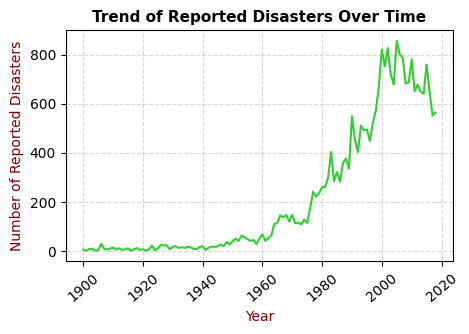

In [ ]:
# Mengubah kolom 'Year' menjadi tipe data datetime
df_naturalDisasters['Year'] = pd.to_datetime(df_naturalDisasters['Year'], format='%Y')

# Menghitung jumlah bencana per tahun
disasters_per_year = df_naturalDisasters.groupby('Year')['Reported_Disasters'].sum()

# Plot jumlah bencana per tahun
plt.figure(figsize=(5, 3))
plt.plot(disasters_per_year.index, disasters_per_year.values, color='limegreen')
plt.xlabel('Year', fontsize=10, color='#800000')
plt.ylabel('Number of Reported Disasters', fontsize=10, color='#800000')
plt.title('Trend of Reported Disasters Over Time', fontsize=11, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=40)
plt.show()


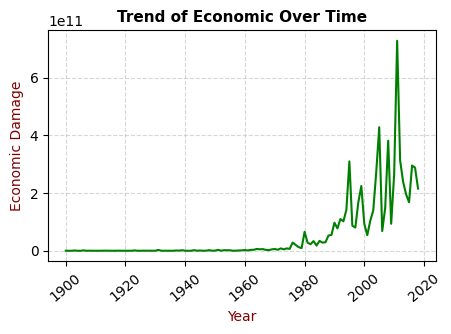

In [ ]:
# Mengubah kolom 'Year' menjadi tipe data datetime
df_naturalDisasters['Year'] = pd.to_datetime(df_naturalDisasters['Year'], format='%Y')

# Menghitung jumlah bencana per tahun
disasters_per_year = df_naturalDisasters.groupby('Year')['Economic_Damage'].sum()

# Plot jumlah bencana per tahun
plt.figure(figsize=(5, 3))
plt.plot(disasters_per_year.index, disasters_per_year.values, color='green')
plt.xlabel('Year', fontsize=10, color='#800000')
plt.ylabel('Economic Damage', fontsize=10, color='#800000')
plt.title('Trend of Economic Over Time', fontsize=11, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=40)
plt.show()


### Melihat Total Keseluruhan

<ipython-input-299-3be24d5f0e4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_naturalDisasters['Economic_Damage'] = pd.to_numeric(df_naturalDisasters['Economic_Damage'], errors='coerce')


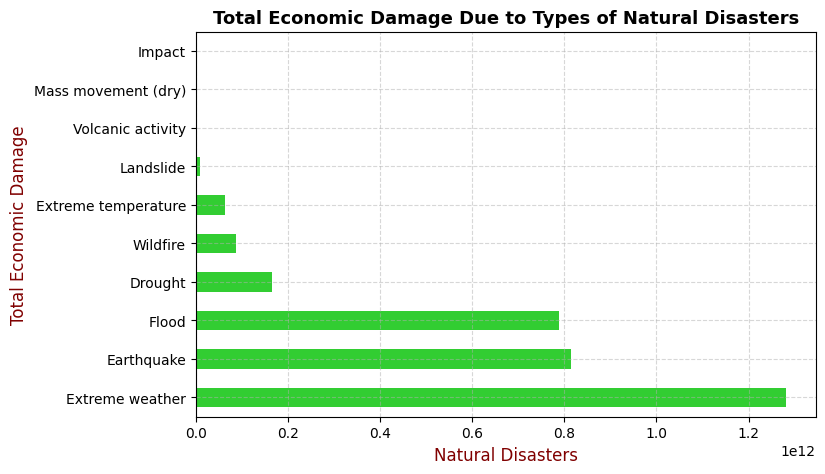

In [ ]:
# Menghapus semua baris, di mana 'Entity' -nya adalah 'All natural disasters'
# Karena All Natural Disasters merupakan hasil semua rekap data dan dianggap tidak penting
df_naturalDisasters = df_naturalDisasters[df_naturalDisasters['Entity'] != 'All natural disasters']

# Memastikan kolom 'Economic_Damage' adalah tipe data numerik
df_naturalDisasters['Economic_Damage'] = pd.to_numeric(df_naturalDisasters['Economic_Damage'], errors='coerce')

# Menghitung total kerusakan ekonomi per jenis bencana
economic_damage_per_entity = df_naturalDisasters.groupby('Entity')['Economic_Damage'].sum()

# Plot total kerusakan ekonomi per jenis bencana
plt.figure(figsize=(8, 5))
economic_damage_per_entity.sort_values(ascending=False).plot(kind='barh', color='limegreen')
plt.xlabel('Natural Disasters' , fontsize=12, color='#800000')
plt.ylabel('Total Economic Damage', fontsize=12, color='#800000')
plt.title('Total Economic Damage Due to Types of Natural Disasters', fontsize=13, weight="bold")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## **Simple Linear Regression**

Estimated coefficients:
b_0 = 227600979.9217739  
b_1 = 251727671.01805794


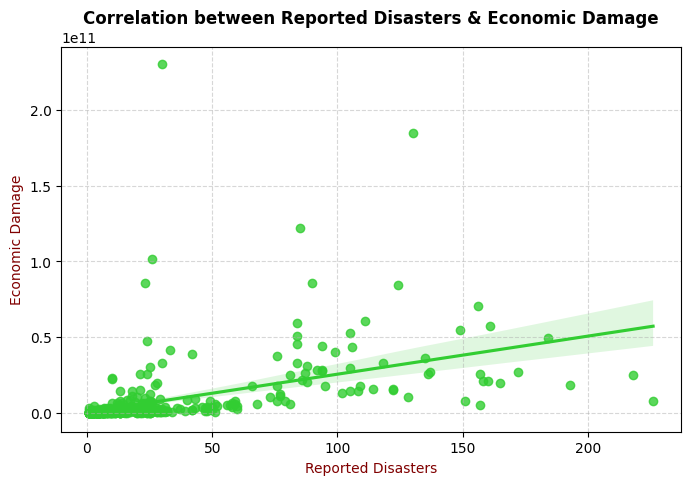

In [ ]:
# Simple Linear Regression Function
def simple_linear_regression(X, y):
    # Number of observations/points
    n = np.size(X)

    # Mean of x and y vector
    m_X, m_y = np.mean(X), np.mean(y)

    # Calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*X) - n*m_y*m_X
    SS_xx = np.sum(X*X) - n*m_X*m_X

    # Calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_X

    return (b_0, b_1)

# Function to show the data points and the regression line
def plot_regression_line(X, y, b):
    # Plotting the actual points as scatter plot
    plt.scatter(X, y, color = "green", marker = "o", s = 70)

    # Predicted response vector
    y_pred = b[0] + b[1]*X

    # Plotting the regression line
    plt.plot(X, y_pred, color = "red")

    # Putting labels for x and y axis
    plt.xlabel('Year')
    plt.ylabel('Monthly Average')

    # Adding a title directly in the set_title function
    plt.gca().set_title('Simple Linear Regression Year & Monthly Average')

    # Function to show plot
    plt.show()

# Assuming that you have a pandas DataFrame df, and you are going to predict 'Year' using the feature 'Monthly_Average'
X = df_naturalDisasters['Reported_Disasters'].values
y = df_naturalDisasters['Economic_Damage'].values

# Getting the regression coefficients
b = simple_linear_regression(X, y)
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1]))

# Plotting the regression line and the data points
plt.figure(figsize=(8, 5))
sns.regplot(x='Reported_Disasters', y='Economic_Damage', data=df_naturalDisasters, color='limegreen')
plt.title('Correlation between Reported Disasters & Economic Damage', fontsize=12, weight="bold")
plt.xlabel('Reported Disasters' , fontsize=10, color='#800000')
plt.ylabel('Economic Damage', fontsize=10, color='#800000')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Hasil Analisis :**

- Dari grafik scatter plot diatas menunjukkan, bahwa ada korelasi positif antara jumlah bencana yang dilaporkan dan kerusakan ekonomi. Ini berarti bahwa semakin banyak bencana yang dilaporkan, semakin besar pula kerusakan ekonomi yang dihasilkan.
- Selain itu, dilihat juga dari data-nya, data tampaknya cukup bervariasi. Meskipun ada tren umum, masih ada banyak titik data yang jauh dari garis tren. Ini menunjukkan bahwa ada banyak variasi dalam data dan bahwa ada banyak bencana dengan kerusakan ekonomi yang relatif rendah atau tinggi, terlepas dari jumlah bencana yang dilaporkan.
- Secara keseluruhan, grafik tersebut memberikan gambaran yang jelas tentang hubungan antara jumlah bencana yang dilaporkan dan kerusakan ekonomi.

In [ ]:
# Load Dataset
df = df_number.merge(df_economic,on=['Entity', 'Year'])
df.head()

,Entity,Year,Reported_Disasters,Economic_Damage
0,All natural disasters,1900,5,30000000
1,All natural disasters,1901,2,0
2,All natural disasters,1902,9,0
3,All natural disasters,1903,8,480000000
4,All natural disasters,1904,2,0


### Membuat Prediksi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ubah kolom 'Year' menjadi tipe integer
df['Year'] = df['Year'].astype(int)

# Pisahkan data menjadi fitur (X) dan target (y)
X = df[['Year']]
y = df[['Reported_Disasters', 'Economic_Damage']]

# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model regresi linier
model = LinearRegression()

# Latih model dengan data pelatihan
model.fit(X_train, y_train)

# Prediksi target untuk set pengujian
y_pred = model.predict(X_test)

# Hitung kesalahan kuadrat rata-rata (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')

# Prediksi untuk tahun mendatang
years = np.array([2025, 2026, 2027, 2028, 2029]).reshape(-1, 1)
future_pred = model.predict(years)

print(f'Predictions for future years: {future_pred}')

Root Mean Squared Error: 18639710648.421524
Predictions for future years: [[8.92047636e+01 2.82845966e+10]
 [9.01454266e+01 2.86288860e+10]
 [9.10860896e+01 2.89731754e+10]
 [9.20267526e+01 2.93174648e+10]
 [9.29674156e+01 2.96617543e+10]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Membuat Prediksi untuk tahun mendatang
years = np.array([2019,2020,2021,2022,2023,2024, 2025, 2026, 2027, 2028, 2029]).reshape(-1, 1)
future_pred = model.predict(years)

# Buat DataFrame baru untuk hasil prediksi
df_pred = pd.DataFrame(future_pred, columns=['Reported_Disasters', 'Economic_Damage'])
df_pred['Year'] = years

print(df_pred)


    Reported_Disasters  Economic_Damage  Year
0            83.560786     2.621886e+10  2019
1            84.501449     2.656315e+10  2020
2            85.442112     2.690744e+10  2021
3            86.382775     2.725173e+10  2022
4            87.323438     2.759602e+10  2023
5            88.264101     2.794031e+10  2024
6            89.204764     2.828460e+10  2025
7            90.145427     2.862889e+10  2026
8            91.086090     2.897318e+10  2027
9            92.026753     2.931746e+10  2028
10           92.967416     2.966175e+10  2029


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Perbandingan Nilai Actual & Pedicted

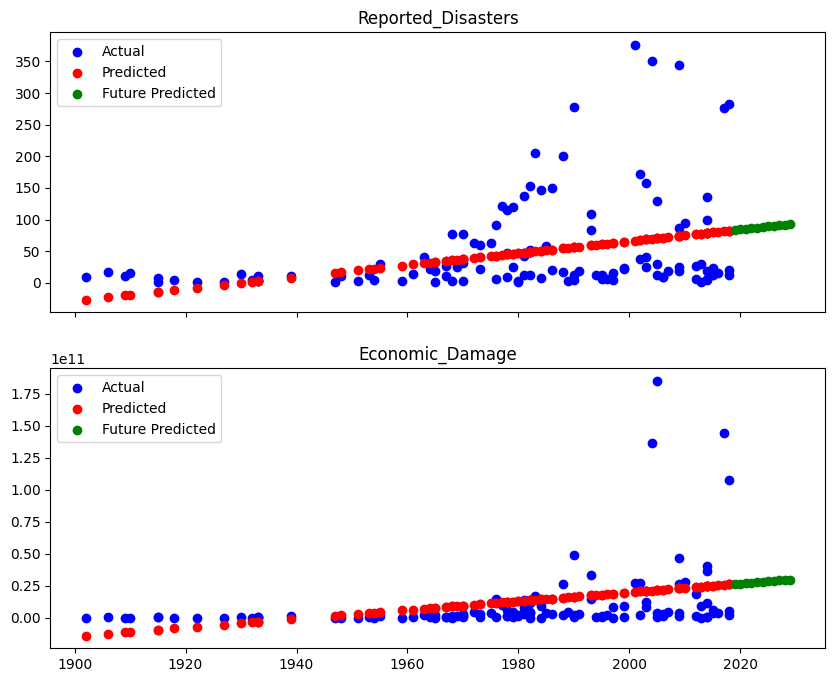

In [ ]:
import matplotlib.pyplot as plt

# Create two subplots
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 8))


# Create a scatter plot of the actual test values versus the predicted values for 'Reported_Disasters'
axs[0].scatter(X_test, y_test['Reported_Disasters'], color='blue', label='Actual')
axs[0].scatter(X_test, y_pred[:, 0], color='red', label='Predicted')
axs[0].scatter(years, future_pred[:, 0], color='green', label='Future Predicted')
axs[0].set_title('Reported_Disasters')
axs[0].legend()

# Create a scatter plot of the actual test values versus the predicted values for 'Economic_Damage'
axs[1].scatter(X_test, y_test['Economic_Damage'], color='blue', label='Actual')
axs[1].scatter(X_test, y_pred[:, 1], color='red', label='Predicted')
axs[1].scatter(years, future_pred[:, 1], color='green', label='Future Predicted')
axs[1].set_title('Economic_Damage')
axs[1].legend()

# Show the plot
plt.show()


## **K-Means**

In [ ]:
# Load Dataset
df = df_number.merge(df_economic,on=['Entity', 'Year'])
df.head()

,Entity,Year,Reported_Disasters,Economic_Damage
0,All natural disasters,1900,5,30000000
1,All natural disasters,1901,2,0
2,All natural disasters,1902,9,0
3,All natural disasters,1903,8,480000000
4,All natural disasters,1904,2,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Entity'] = le.fit_transform(df['Entity'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

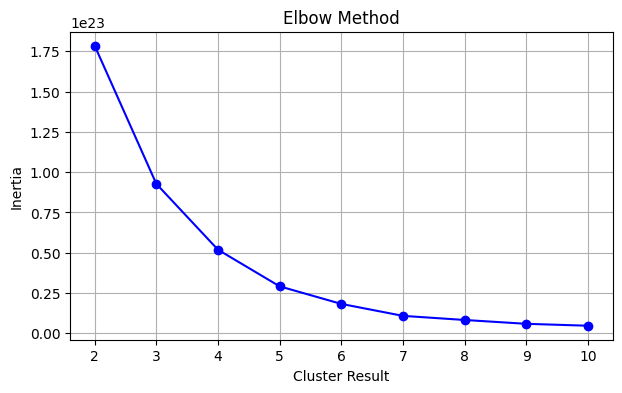

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df.values)
    inertia.append(kmeans.inertia_)
# print(inertia)


#Visualisasi Inertia
plt.figure(figsize=(7, 4))
# plt.plot(inertia)
plt.plot(range(2, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Cluster Result')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

In [ ]:
# Menghitung selisih intertia antar cluster
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    48.027252
1    44.061571
2    43.795021
3    37.367794
4    40.625829
5    23.557877
6    28.697405
7    20.062822
8          NaN
dtype: float64

In [ ]:
# Apply K-Means Clusterring
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
df['cluster'] = kmeans.labels_
# df.head()

In [ ]:
df['cluster'].unique()

array([0, 2, 1], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


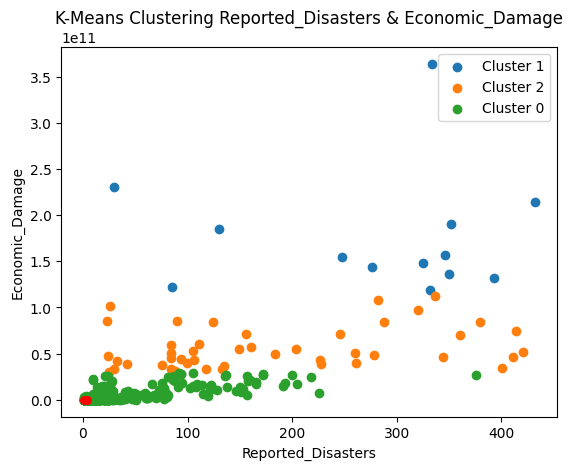

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Memilih kolom 'Reported_Disasters' dan 'Economic_Damage' untuk pengelompokan
X = df[['Reported_Disasters', 'Economic_Damage']]

# Membuat objek KMeans dengan jumlah kluster yang diinginkan
kmeans = KMeans(n_clusters=3)

# Melakukan pengelompokan
kmeans.fit(X)

# Menampilkan DataFrame dengan label kluster
# print(df.head())

cluster0 = df[df['cluster'] == 0]
cluster1 = df[df['cluster'] == 1]
cluster2 = df[df['cluster'] == 2]

plt.scatter(cluster1['Reported_Disasters'],cluster1['Economic_Damage'],label='Cluster 1')
plt.scatter(cluster2['Reported_Disasters'],cluster2['Economic_Damage'],label='Cluster 2')
plt.scatter(cluster0['Reported_Disasters'],cluster0['Economic_Damage'],label='Cluster 0')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=30)
plt.legend()

# Visualisasi hasil pengelompokan
plt.gca().set_title('K-Means Clustering Reported_Disasters & Economic_Damage')
plt.xlabel('Reported_Disasters')
plt.ylabel('Economic_Damage')
plt.show()



- Klaster Biru (Cluster 1): Klaster ini menunjukkan kerusakan ekonomi tinggi meskipun jumlah bencana yang dilaporkan relatif rendah. Ini bisa berarti bahwa meskipun jumlah bencana yang terjadi tidak banyak, dampaknya terhadap ekonomi sangat signifikan.
- Klaster Oranye (Cluster 2): Klaster ini memiliki kerusakan ekonomi dan jumlah bencana yang dilaporkan di kisaran menengah. Ini bisa berarti bahwa ada keseimbangan antara jumlah bencana yang terjadi dan dampaknya terhadap ekonomi.
- Klaster Hijau (Cluster 0): Klaster ini menunjukkan kerusakan ekonomi rendah dengan jumlah bencana yang dilaporkan juga rendah. Ini bisa berarti bahwa meskipun ada beberapa bencana yang terjadi, dampaknya terhadap ekonomi relatif kecil.

In [ ]:
#Menunjukkan centroid dari kmeans
kmeans.cluster_centers_

array([[2.73406375e+01, 3.12690760e+09],
       [2.79461538e+02, 1.76766551e+11],
       [1.79021739e+02, 5.58001538e+10]])

In [ ]:
cluster0.describe()

,Entity,Year,Reported_Disasters,Economic_Damage,cluster
count,503.000000,503.000000,503.000000,5.030000e+02,503.0
mean,3.809145,1973.976143,27.495030,3.179456e+09,0.0
std,3.142587,30.327880,41.573957,6.101475e+09,0.0
min,0.000000,1900.000000,1.000000,0.000000e+00,0.0
25%,1.000000,1954.000000,6.000000,5.098050e+07,0.0
50%,4.000000,1980.000000,13.000000,6.000000e+08,0.0
75%,5.000000,1998.000000,26.000000,2.782169e+09,0.0
max,10.000000,2018.000000,376.000000,2.955874e+10,0.0


In [ ]:
cluster1.describe()

,Entity,Year,Reported_Disasters,Economic_Damage,cluster
count,13.000000,13.000000,13.000000,1.300000e+01,13.0
mean,0.769231,2009.538462,279.461538,1.767666e+11,1.0
std,1.535895,6.199669,123.159528,6.601262e+10,0.0
min,0.000000,1995.000000,30.000000,1.194842e+11,1.0
25%,0.000000,2005.000000,248.000000,1.363784e+11,1.0
50%,0.000000,2011.000000,332.000000,1.549670e+11,1.0
75%,0.000000,2013.000000,350.000000,1.908492e+11,1.0
max,4.000000,2017.000000,432.000000,3.640932e+11,1.0


In [ ]:
cluster2.describe()

,Entity,Year,Reported_Disasters,Economic_Damage,cluster
count,45.000000,45.000000,45.000000,4.500000e+01,45.0
mean,2.155556,2004.111111,180.666667,5.638330e+10,2.0
std,2.055542,9.415225,124.289984,2.223029e+10,0.0
min,0.000000,1980.000000,23.000000,3.042268e+10,2.0
25%,0.000000,1997.000000,84.000000,4.011407e+10,2.0
50%,2.000000,2004.000000,135.000000,4.913758e+10,2.0
75%,4.000000,2013.000000,278.000000,7.075705e+10,2.0
max,5.000000,2018.000000,421.000000,1.122479e+11,2.0
